In [1]:
from faceID import faceID
from emotion_detection import create_model, emotionID
from camera_to_image_array import camera_to_image_array as cam
from dataface_funcs import dataface_add
from getting_name_dataface import match_descriptor_in_dataface as lookup
from image_array_to_descriptors import load_dlib as load
from image_array_to_descriptors import match_image_to_descriptors as match
from dataface_funcs import pickOpen

In [2]:
def faceRec():
    pic = cam()
    dataface = pickOpen()
    face_detect, face_rec_model, shape_predictor = load()
    out, rect = match(face_detect, face_rec_model, shape_predictor, pic)
    names = lookup(dataface, out)
    ax = faceID(pic, rect, names)
    emotionID(pic, ax, face_detect, shape_predictor, create_model())

File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


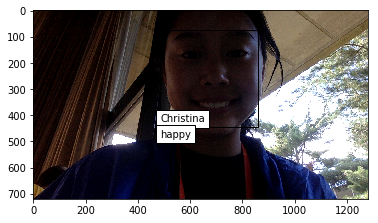

In [4]:
faceRec()